# Short-Time Fourier Transformation

In [105]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import sys
sys.path.insert(0, '..')
from database import mongo_client
from anomaly_detection import feature_extraction as fe
%matplotlib inline
matplotlib.style.use('ggplot')
from IPython.display import display
from IPython.display import HTML

In [106]:
client = mongo_client.CERNMongoClient()

## Setup

The Fourier transform can be precise in time or in frequency, but not both. This is why every collection is tested twice.

In [107]:
# time
fs_t = 400  # Sampling rate
frame_size_t = 0.025  # frame size (window) of 0.025
hop_t = 0.0025  # hop size of 0.0025

# frequency
fs_f = 400
frame_size_f = 0.5
hop_f = 0.25

The frame size and hop will be multiplied with the frequency.
This gives for the time parameters:
* frame of 10 minutes
* hop of 1 minute
The frame is the window over which the fourier transform will be calculated.
The hop is how much the window is moved for every next fourier transform.

And for the frequency parameters:
* frame of 200 minutes
* hop of 100 minutes

## Pressure

In [108]:
df = client.query_resample("^MKI.A.*B1:PRESSURE$", '1T')
t = (pd.to_datetime(pd.Series(df.index), unit="s") - datetime(1970,1,1)).dt.total_seconds()
data = df.iloc[:, 0].values
t_min = t.iloc[0]
t_max = t.iloc[-1]

Fetching data for pattern ^MKI.A.*B1:PRESSURE$
Fetching data for MKI.A5L2.B1:PRESSURE


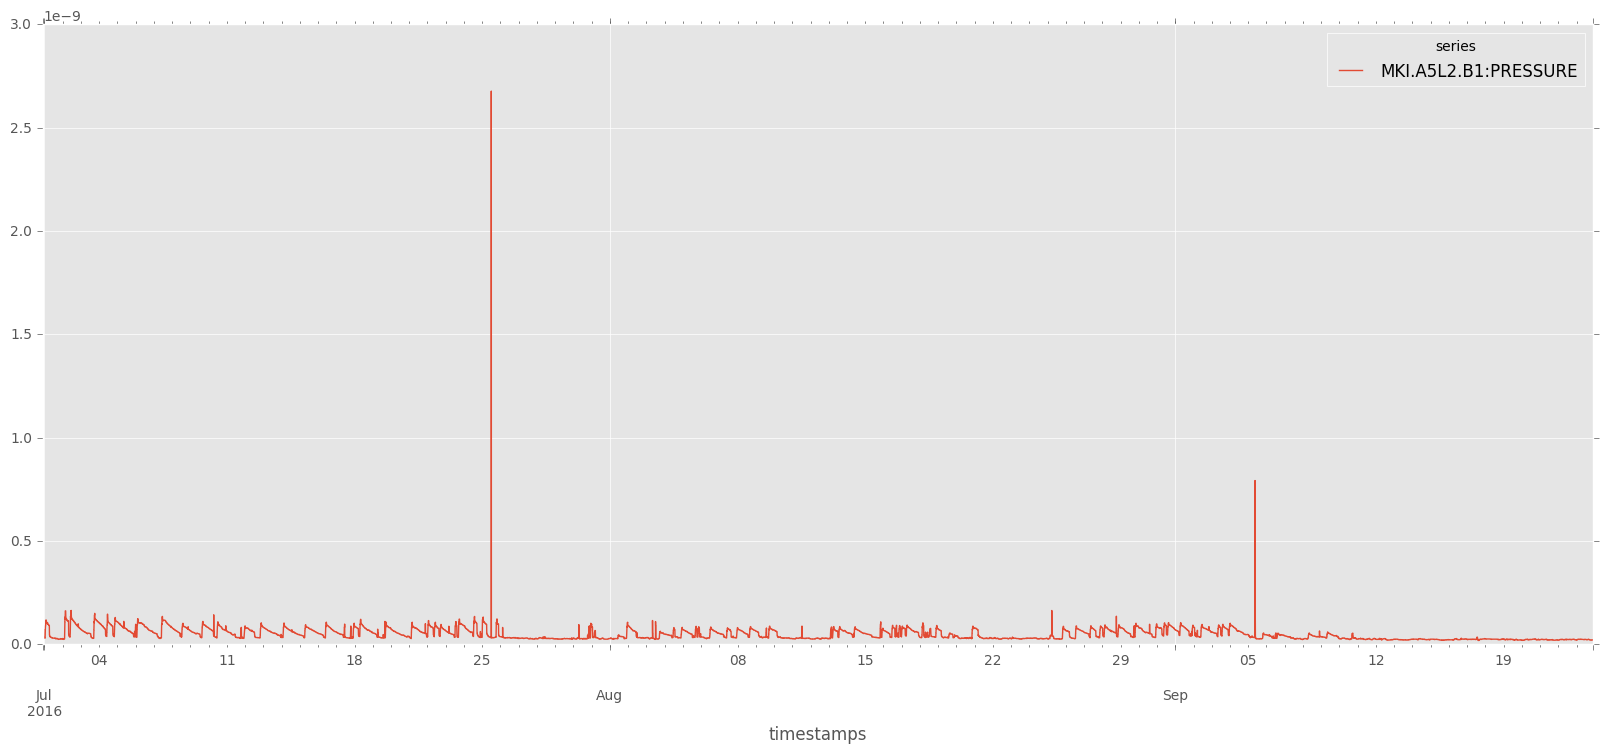

In [109]:
df.plot(figsize=(20, 8))

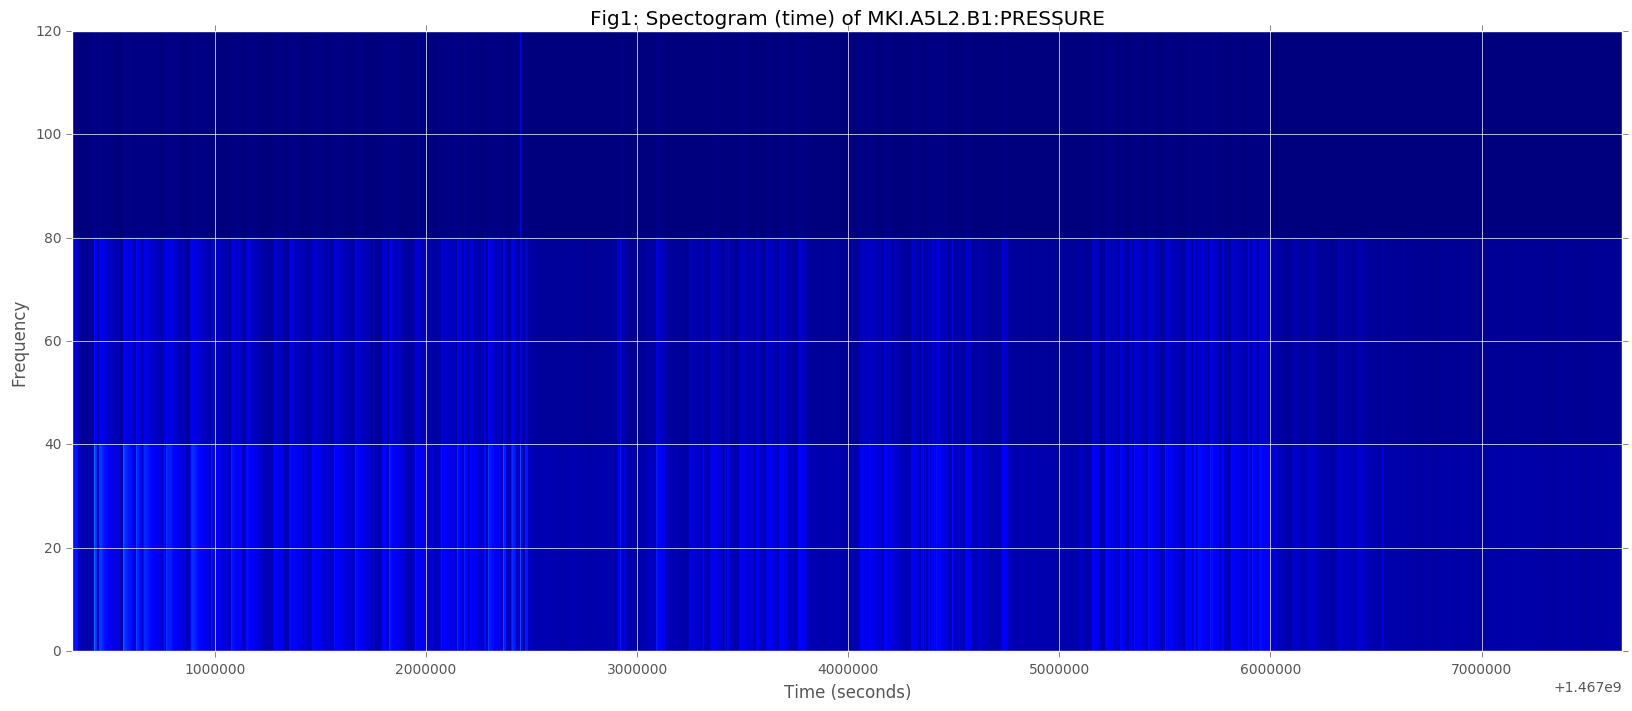

In [110]:
stft = fe.stft(data, fs_t, frame_size_t, hop_t)
fe.plot_spectogram(stft, t_min, t_max, fs_t, frame_size_t, "Fig1: Spectogram (time) of MKI.A5L2.B1:PRESSURE")

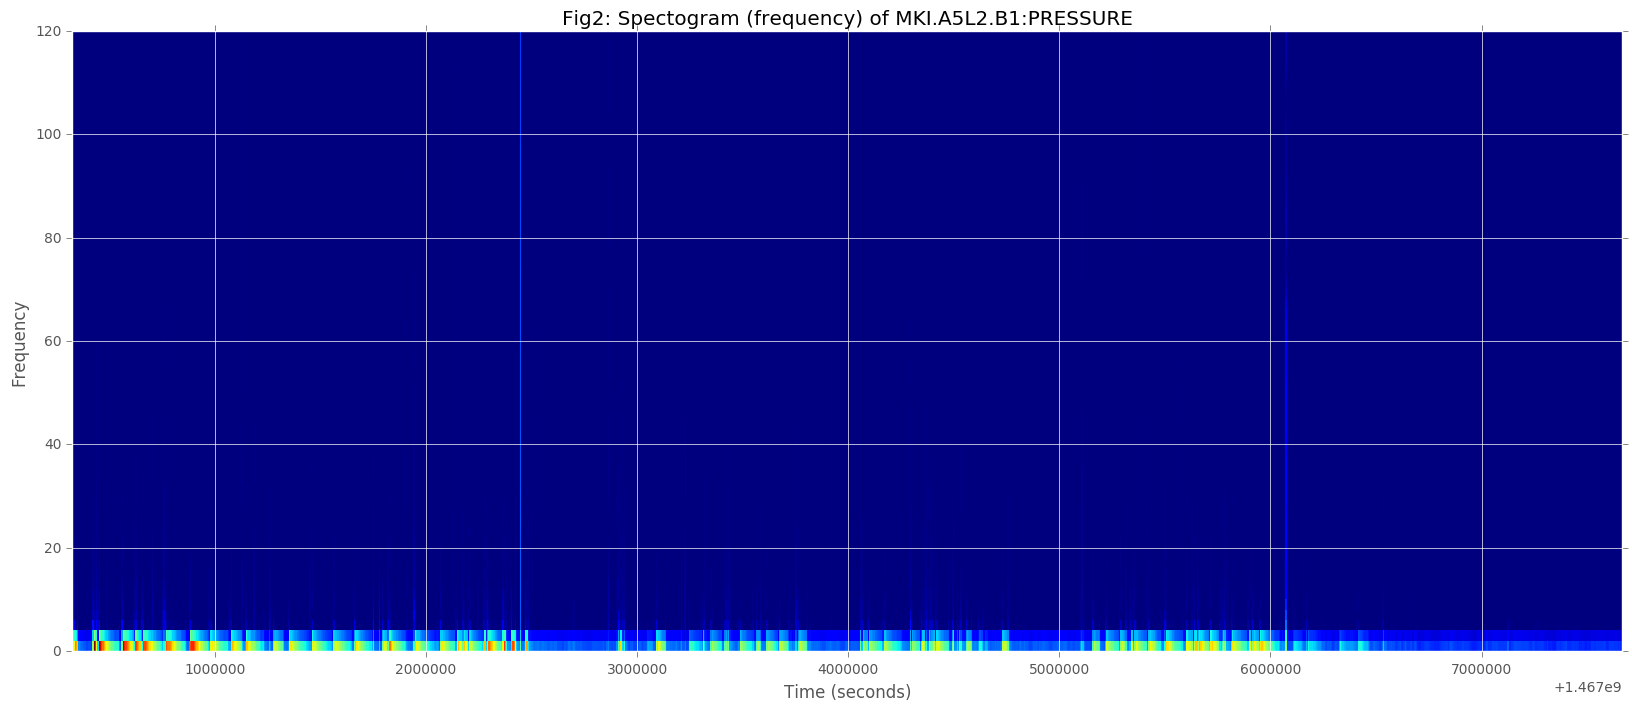

In [111]:
stft = fe.stft(data, fs_f, frame_size_f, hop_f)
fe.plot_spectogram(stft, t_min, t_max, fs_f, frame_size_f, "Fig2: Spectogram (frequency) of MKI.A5L2.B1:PRESSURE")

## Temperature Magnet Up

In [112]:
df = client.query_resample("^MKI.A.*B1:TEMP_MAGNET_UP$", '1T')
t = (pd.to_datetime(pd.Series(df.index), unit="s") - datetime(1970,1,1)).dt.total_seconds()
data = df.iloc[:, 0].values
t_min = t.iloc[0]
t_max = t.iloc[-1]

Fetching data for pattern ^MKI.A.*B1:TEMP_MAGNET_UP$
Fetching data for MKI.A5L2.B1:TEMP_MAGNET_UP


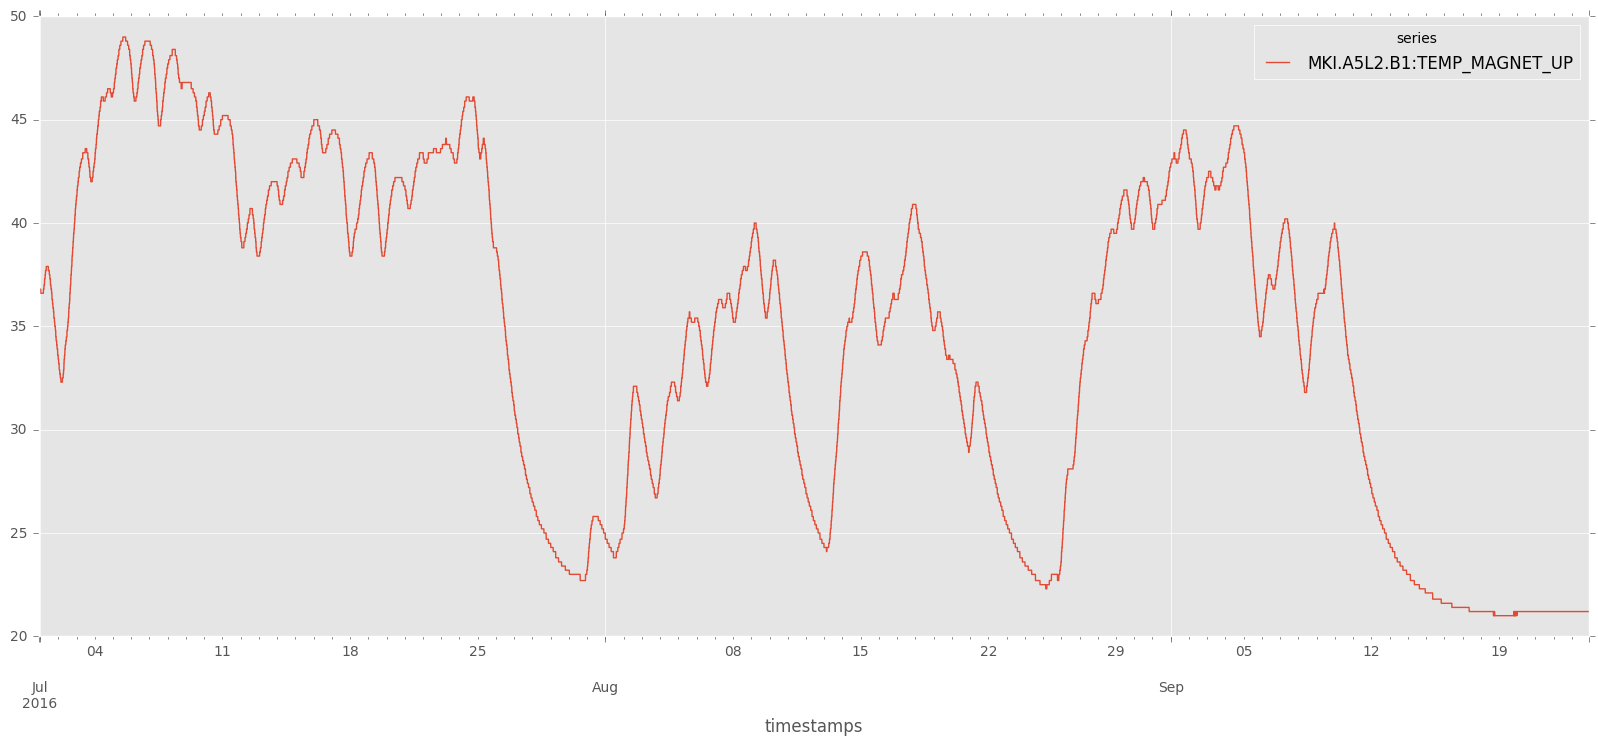

In [113]:
df.plot(figsize=(20, 8))

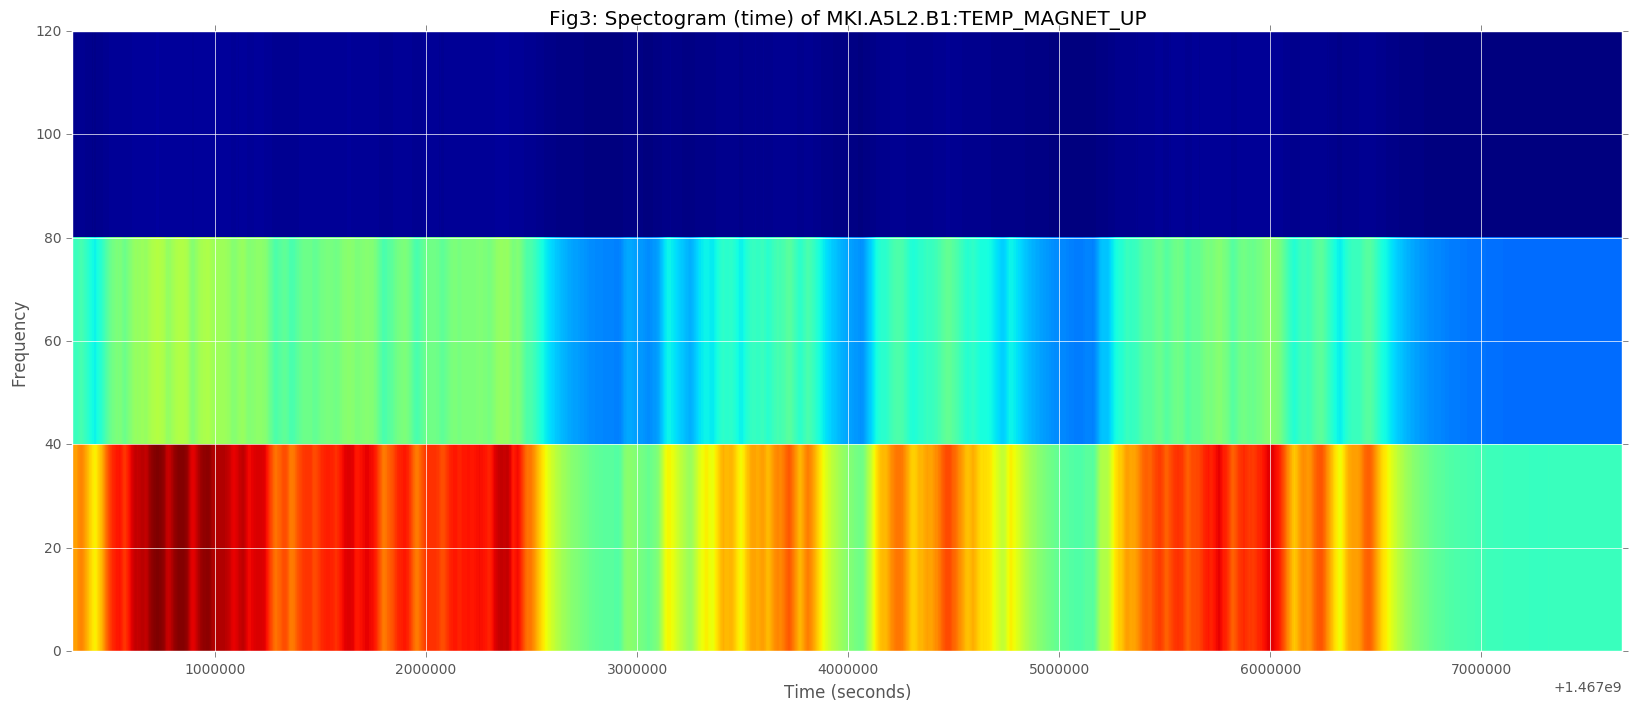

In [114]:
stft = fe.stft(data, fs_t, frame_size_t, hop_t)
fe.plot_spectogram(stft, t_min, t_max, fs_t, frame_size_t, "Fig3: Spectogram (time) of MKI.A5L2.B1:TEMP_MAGNET_UP")

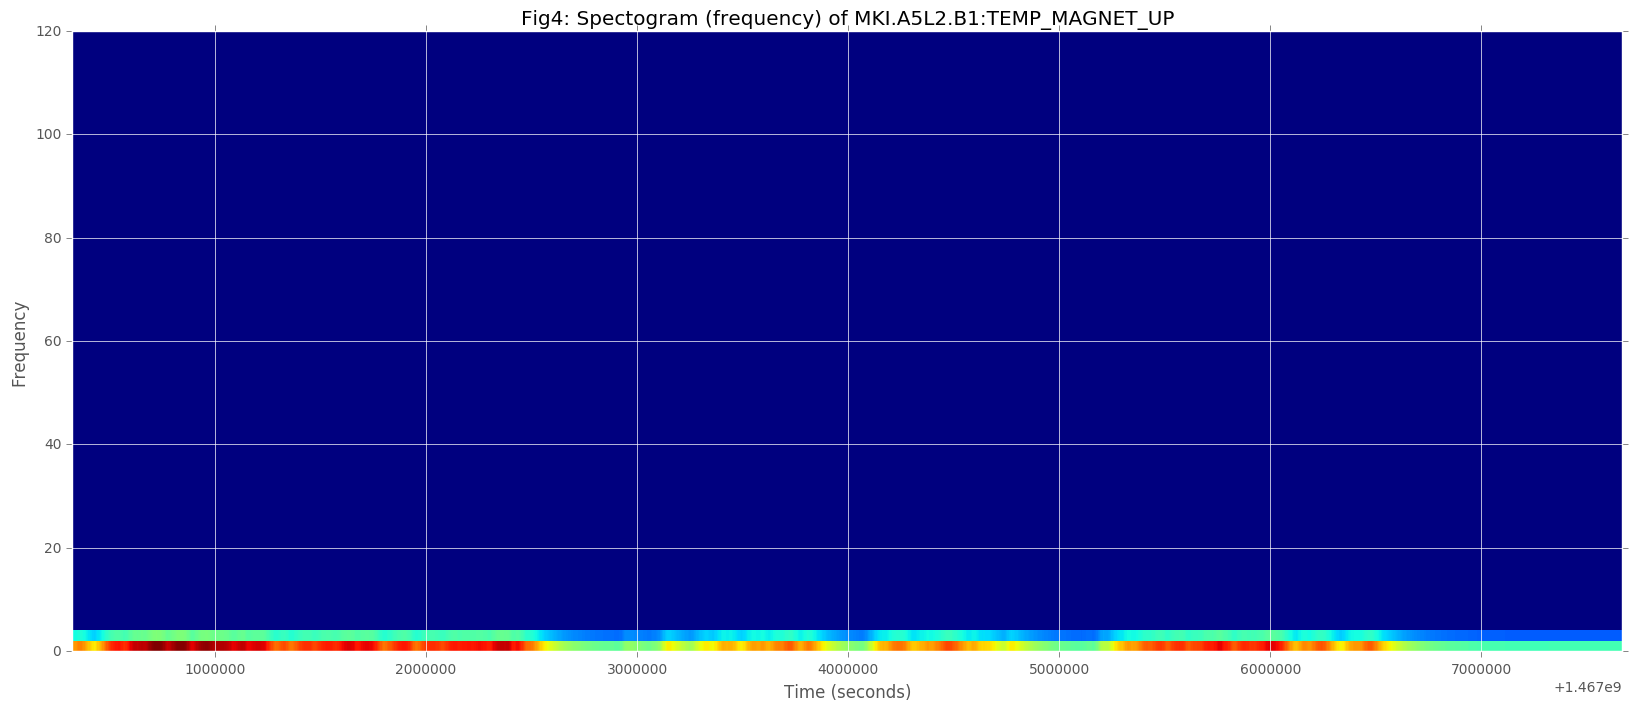

In [115]:
stft = fe.stft(data, fs_f, frame_size_f, hop_f)
fe.plot_spectogram(stft, t_min, t_max, fs_f, frame_size_f, "Fig4: Spectogram (frequency) of MKI.A5L2.B1:TEMP_MAGNET_UP")

## Temperature Magnet Down

In [116]:
df = client.query_resample("^MKI.A.*B1:TEMP_MAGNET_DOWN$", '1T')
t = (pd.to_datetime(pd.Series(df.index), unit="s") - datetime(1970,1,1)).dt.total_seconds()
data = df.iloc[:, 0].values
t_min = t.iloc[0]
t_max = t.iloc[-1]

Fetching data for pattern ^MKI.A.*B1:TEMP_MAGNET_DOWN$
Fetching data for MKI.A5L2.B1:TEMP_MAGNET_DOWN


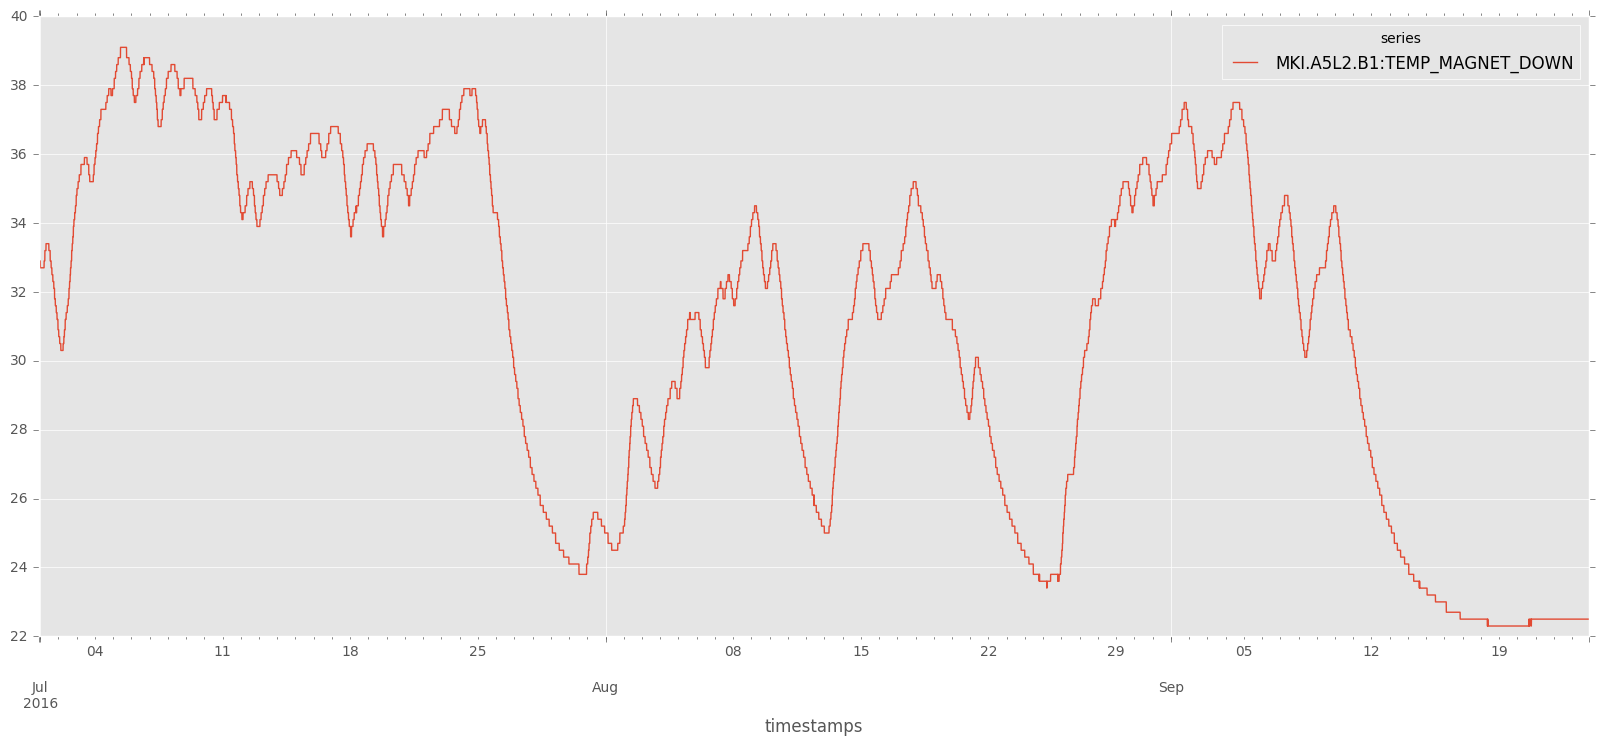

In [117]:
df.plot(figsize=(20, 8))

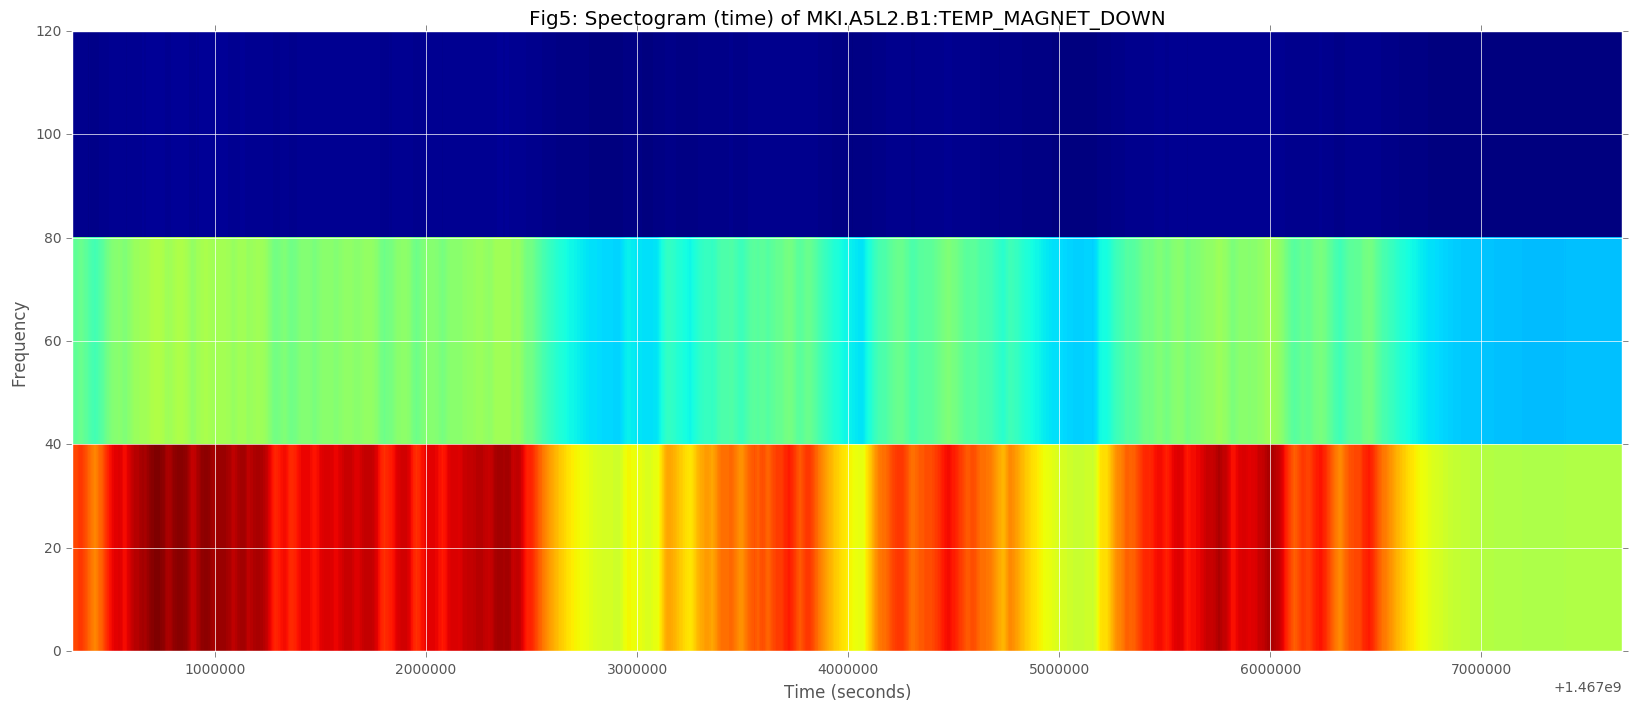

In [118]:
stft = fe.stft(data, fs_t, frame_size_t, hop_t)
fe.plot_spectogram(stft, t_min, t_max, fs_t, frame_size_t, "Fig5: Spectogram (time) of MKI.A5L2.B1:TEMP_MAGNET_DOWN")

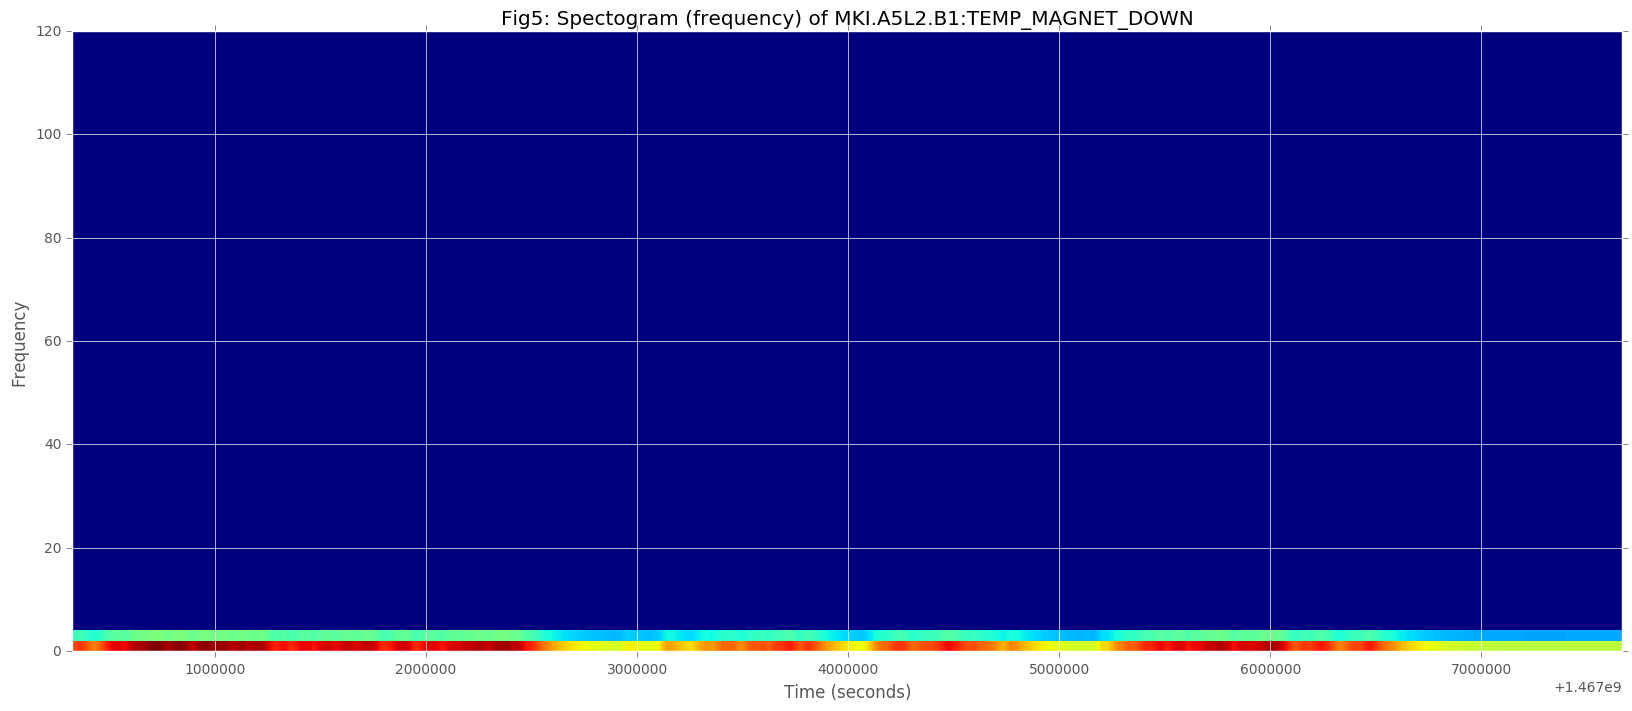

In [119]:
stft = fe.stft(data, fs_f, frame_size_f, hop_f)
fe.plot_spectogram(stft, t_min, t_max, fs_f, frame_size_f, "Fig5: Spectogram (frequency) of MKI.A5L2.B1:TEMP_MAGNET_DOWN")